In [39]:
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

import keras
from keras import models
from keras.models import load_model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D

ImportError: cannot import name 'predict_generator'

In [22]:
IMG_SIZE = 20

In [23]:
modelo = Sequential()

modelo.add(Conv2D(10, (3, 3), activation='relu', input_shape=(IMG_SIZE, IMG_SIZE, 1)))
modelo.add(MaxPooling2D(pool_size=(2, 2)))

modelo.add(Conv2D(10, (3, 3), activation='relu'))
modelo.add(MaxPooling2D(pool_size=(2, 2)))

modelo.add(Conv2D(10, (3, 3), activation='relu'))

modelo.add(Flatten())
modelo.add(Dropout(0.2))
modelo.add(Dense(128, activation='relu'))
modelo.add(Dropout(0.5))
modelo.add(Dense(50, activation='relu'))

modelo.add(Dense(1, activation='sigmoid'))


In [24]:
modelo.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_20 (Conv2D)           (None, 18, 18, 10)        100       
_________________________________________________________________
max_pooling2d_14 (MaxPooling (None, 9, 9, 10)          0         
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 7, 7, 10)          910       
_________________________________________________________________
max_pooling2d_15 (MaxPooling (None, 3, 3, 10)          0         
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 1, 1, 10)          910       
_________________________________________________________________
flatten_4 (Flatten)          (None, 10)                0         
_________________________________________________________________
dropout_4 (Dropout)          (None, 10)                0         
__________

In [25]:
modelo.compile(loss='binary_crossentropy', optimizer='adam', metrics = ['accuracy'])

In [26]:
from keras.preprocessing.image import ImageDataGenerator
datagen = ImageDataGenerator(
    rotation_range=0.15,
    width_shift_range=0.02,
    height_shift_range=0.02,
    shear_range=0.01,
    zoom_range=0.15,
    rescale=1./255,
    fill_mode='reflect')

In [27]:
from keras.preprocessing.image import ImageDataGenerator

test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = datagen.flow_from_directory("C:\\Users\\Daniel\\Downloads\\chest_xray\\train",
                        target_size=(IMG_SIZE, IMG_SIZE),
                        batch_size=19,
                        class_mode='binary',
                        color_mode = "grayscale")#grayscale

validation_generator = test_datagen.flow_from_directory("C:\\Users\\Daniel\\Downloads\\chest_xray\\val",
                        target_size=(IMG_SIZE, IMG_SIZE),
                        batch_size=19,
                        class_mode='binary',
                        color_mode = "grayscale")

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [28]:
history = modelo.fit_generator(train_generator,steps_per_epoch=100,epochs=30,validation_data=validation_generator,validation_steps=50)

Epoch 1/30
100/100 [==============================] - 24s 239ms/step - loss: 0.5894 - acc: 0.7411 - val_loss: 0.8452 - val_acc: 0.5000
Epoch 2/30
100/100 [==============================] - 24s 243ms/step - loss: 0.5683 - acc: 0.7316 - val_loss: 0.7081 - val_acc: 0.5000
Epoch 3/30
100/100 [==============================] - 24s 236ms/step - loss: 0.4648 - acc: 0.7696 - val_loss: 0.5406 - val_acc: 0.8125
Epoch 4/30
100/100 [==============================] - 24s 239ms/step - loss: 0.3523 - acc: 0.8463 - val_loss: 0.4592 - val_acc: 0.8750
Epoch 5/30
100/100 [==============================] - 23s 230ms/step - loss: 0.3408 - acc: 0.8495 - val_loss: 0.5415 - val_acc: 0.8125
Epoch 6/30
100/100 [==============================] - 23s 233ms/step - loss: 0.3059 - acc: 0.8637 - val_loss: 0.6194 - val_acc: 0.8125
Epoch 7/30
100/100 [==============================] - 23s 229ms/step - loss: 0.2854 - acc: 0.8863 - val_loss: 0.5003 - val_acc: 0.8125
Epoch 8/30
100/100 [==============================] - 2

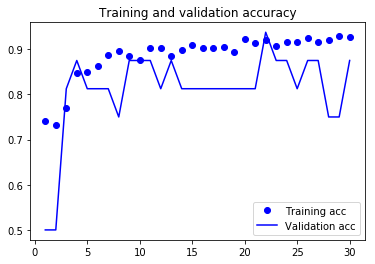

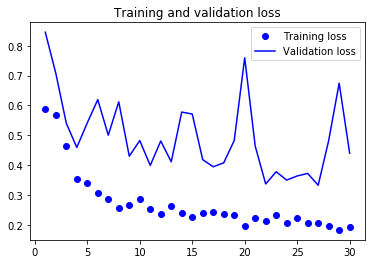

In [29]:
import matplotlib.pyplot as plt
acc = history.history['acc']
val_acc = history.history['val_acc']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1, len(acc) + 1)
plt.plot(epochs, acc, 'bo', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'bo', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss')
plt.legend()
plt.show()

In [30]:
testGen = test_datagen.flow_from_directory("C:\\Users\\Daniel\\Downloads\\chest_xray\\test",
                        target_size=(IMG_SIZE, IMG_SIZE),
                        batch_size=19,
                        class_mode='binary',
                        color_mode = "grayscale")

Found 624 images belonging to 2 classes.


In [41]:
a = modelo.predict_generator(testGen,verbose=1,steps=30)
a

30/30 [==============================] - 21s 702ms/step


array([[0.261413  ],
       [0.99809504],
       [0.9777169 ],
       [0.9993899 ],
       [0.9972502 ],
       [0.9958713 ],
       [0.9963372 ],
       [0.9339932 ],
       [0.84368736],
       [0.5348661 ],
       [0.92311144],
       [0.8658524 ],
       [0.98844624],
       [0.96610737],
       [0.96522784],
       [0.98010755],
       [0.96845686],
       [0.06453943],
       [0.9702574 ],
       [0.9890889 ],
       [0.12477839],
       [0.0698899 ],
       [0.98648405],
       [0.8271925 ],
       [0.852507  ],
       [0.9991151 ],
       [0.8656366 ],
       [0.99660945],
       [0.99575293],
       [0.8941025 ],
       [0.85209274],
       [0.04950234],
       [0.06275746],
       [0.9958188 ],
       [0.65638614],
       [0.04457445],
       [0.43975678],
       [0.89958483],
       [0.8715522 ],
       [0.9993547 ],
       [0.13152772],
       [0.0978089 ],
       [0.62209654],
       [0.9999188 ],
       [0.99315476],
       [0.98588073],
       [0.9792392 ],
       [0.109

In [76]:
import os
from random import shuffle
def load_training_data():
    DIR = "C:\\Users\\Daniel\\Downloads\\chest_xray\\test\\PNEUMONIA"
    train_data = []
    for img in os.listdir(DIR):
        label = [0]
        path = os.path.join(DIR, img)
        if "DS_Store" not in path:
            img = Image.open(path)
            img = img.convert('L')
            img = img.resize((IMG_SIZE, IMG_SIZE), Image.ANTIALIAS)
            train_data.append([np.array(img), label])
            
    shuffle(train_data)
    return train_data

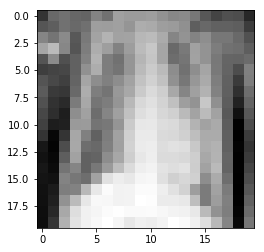

In [77]:
train_data = load_training_data()
plt.imshow(train_data[43][0], cmap = 'gist_gray')

In [78]:
trainImages = np.array([i[0] for i in train_data]).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
trainLabels = np.array([i[1] for i in train_data])

In [79]:
saida = modelo.predict(trainImages)

In [82]:
saida

array([[1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],
       [1.],

In [80]:
porcentagem = sum([1 if i==0 else 0 for i in saida ])/len(saida)

In [81]:
porcentagem

0.0